## GRIP :The Spark Foundation

### Data Science and Buisness Analytics - Task 1

#### Prediction Using Supervised Machine Learning (Simple Linear Regression)

### 1. Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


## 2.Read Data From URL

In [3]:
#Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported succ")

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3.Exploring Data

In [4]:
print(df.shape)

(25, 2)


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.index

RangeIndex(start=0, stop=25, step=1)

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

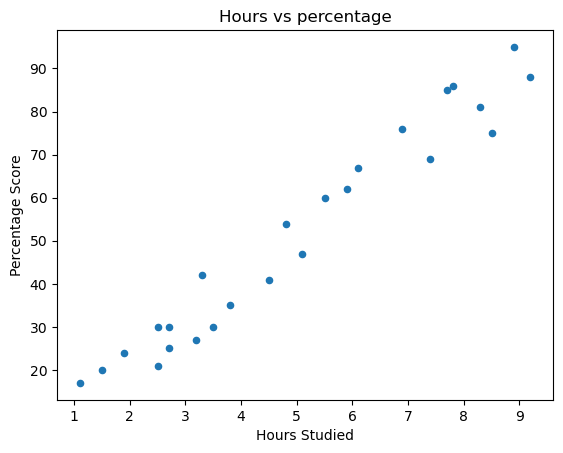

In [10]:
df.plot (x ='Hours',y ='Scores' ,kind ='scatter')
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [12]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


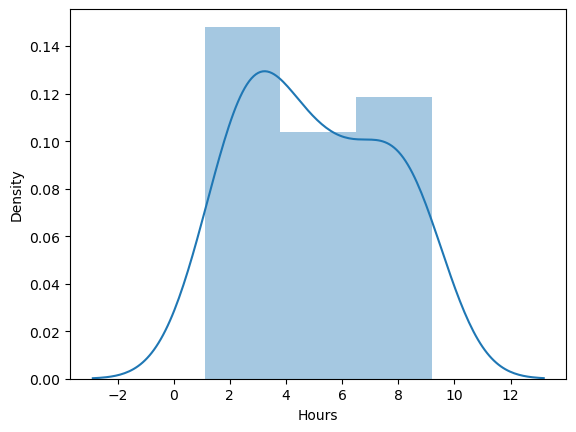

In [13]:
sns.distplot(df['Hours'])
plt.show()

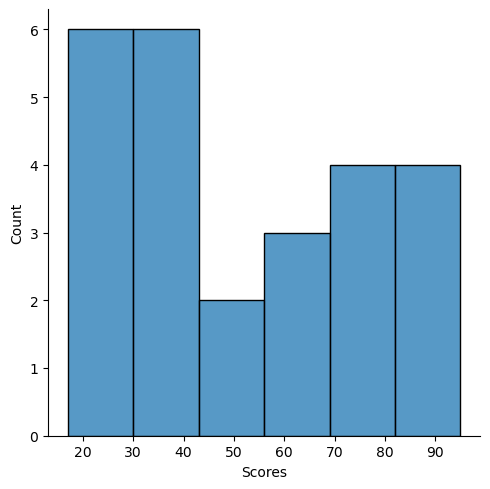

In [14]:
sns.displot(df['Scores'])
plt.show()

### 4.Linear Regression

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size =0.2,random_state =1)

### 5.Trainig Algoritm

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

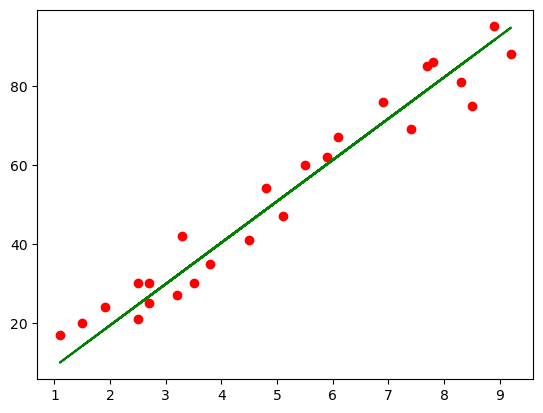

In [33]:
#plotting the regression line
n = lr.coef_
c = lr.intercept_
line = n*X + c

#plotting for test data
plt.scatter(X,y, c = "r")
plt.plot(X,line , c = "g");
plt.show()

In [26]:
#Marking predicition
y_pred = lr.predict(X_test) #Predicting the score

In [27]:
predicition = pd.DataFrame({'Target':y_test , 'predicted': y_pred})
predicition

,Target,predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


## 6.What would be the the predicted score if a students studies for 9.25 hours/day ?

In [28]:
h = 9.25 
s = lr.predict([[h]])
print("No of Hours = {}". format(h))
print("Predicted Score ={}".format(s[0]))

No of Hours = 9.25
Predicted Score =95.22829438402952


### 7.Model Evaluation

In [31]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print('Mean Absolute Error :',
     metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:' , r2_score(y_test,y_pred)) 

Mean Absolute Error : 7.882398086270432
R2 Score: 0.8421031525243527
